In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import sys
import optparse
import subprocess
import random

import sqlite3

import csv

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns

import pygraphviz

import numpy as np

# import scipy

In [2]:
conn = sqlite3.connect('database.db')
conn.text_factory = str
c = conn.cursor()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f077523db38>], dtype=object)

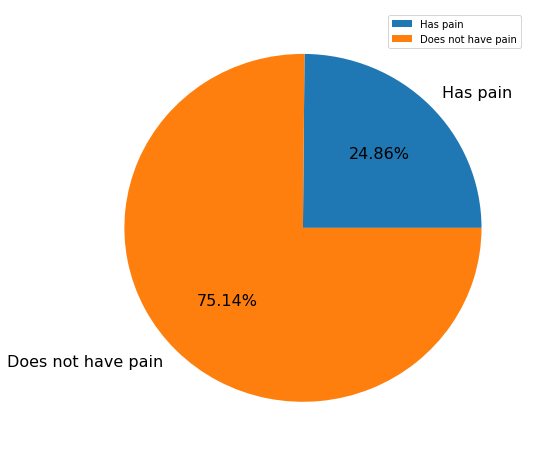

In [3]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1"
  
x = ["Has pain", "Does not have pain"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f07731e5438>], dtype=object)

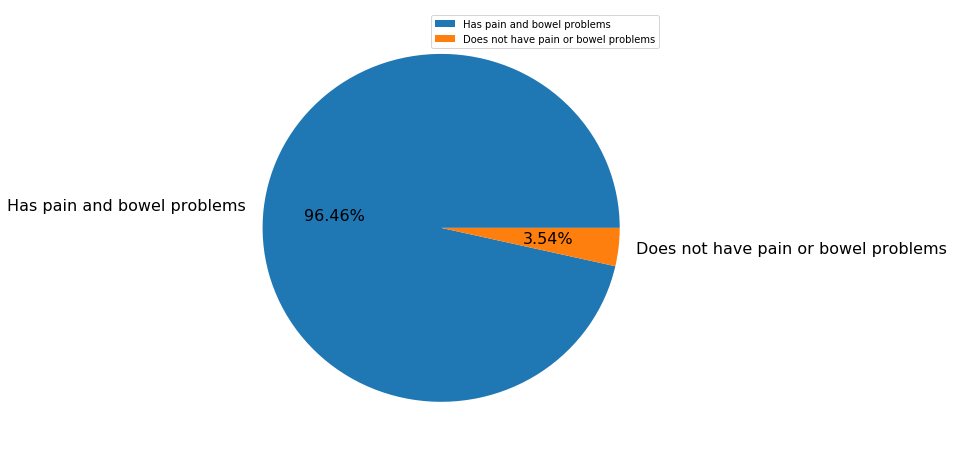

In [4]:
condition = "( bowel_health.BHQ010_b = 1 OR bowel_health.BHQ020_b = 1 OR bowel_health.BHQ030_b = 1 OR bowel_health.BHQ040_b = 1 OR bowel_health.BHD050_b = 1 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1 AND "+condition
  
x = ["Has pain and bowel problems", "Does not have pain or bowel problems"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
condition = "( bowel_health.BHQ010_b = 0 AND bowel_health.BHQ020_b = 0 AND bowel_health.BHQ030_b = 0 AND bowel_health.BHQ040_b = 0 AND bowel_health.BHD050_b = 0 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0 AND "+condition 
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f077319dc50>], dtype=object)

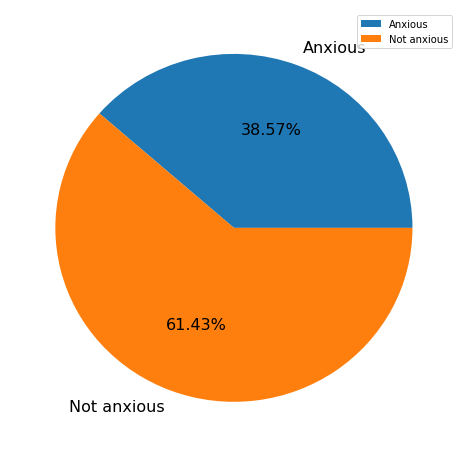

In [5]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 1"

x = ["Anxious", "Not anxious"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%',fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772fad6a0>], dtype=object)

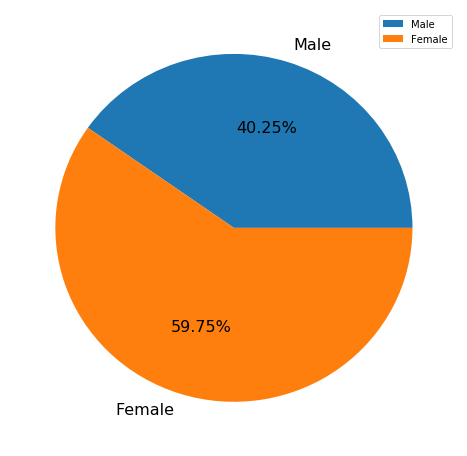

In [6]:
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 1"

x = ["Male", "Female"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 2"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

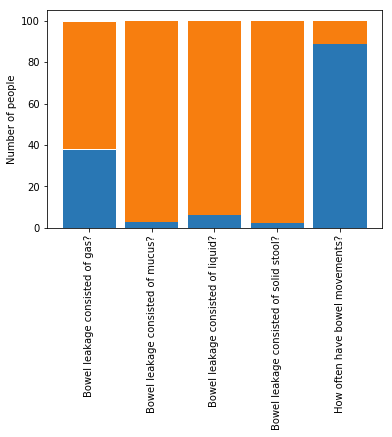

In [7]:
BHQ010 = 'Bowel leakage consisted of gas?'
BHQ020 = 'Bowel leakage consisted of mucus?'
BHQ030 = 'Bowel leakage consisted of liquid?'
BHQ040 = 'Bowel leakage consisted of solid stool?'
BHD050 = 'How often have bowel movements?'

yes = []
no = []
cond1 = ['bowel_health.BHQ010_b = 1', 'bowel_health.BHQ020_b = 1', 'bowel_health.BHQ030_b = 1', 'bowel_health.BHQ040_b = 1', 'bowel_health.BHD050_b = 1']
cond2 = ['bowel_health.BHQ010_b = 0', 'bowel_health.BHQ020_b = 0', 'bowel_health.BHQ030_b = 0', 'bowel_health.BHQ040_b = 0', 'bowel_health.BHD050_b = 0']

for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[0]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[0]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[1]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[1]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[2]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[2]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[3]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[3]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[4]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[4]):
 no.append(row[0])
    
# Data
r = [0,1,2,3,4]
raw_data = {'blueBars': yes, 'orangeBars': no}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['blueBars'], df['orangeBars'])]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.85
names = (BHQ010, BHQ020, BHQ030, BHQ040, BHD050)

plt.bar(r, blueBars, color='#2977b4', edgecolor='white', width=barWidth)

plt.bar(r, orangeBars, bottom=blueBars, color='#f77e0f', edgecolor='white', width=barWidth)

plt.xticks(r, names,rotation=90)

plt.ylabel("Number of people")
 
# Show graphic
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772f653c8>], dtype=object)

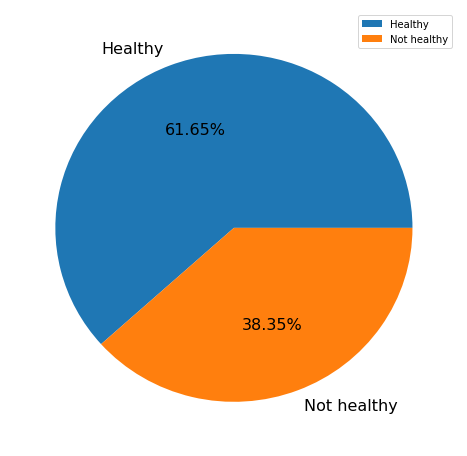

In [8]:
#How healthy is the diet?
x = ["Healthy", "Not healthy"]
y = []
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772efd5f8>], dtype=object)

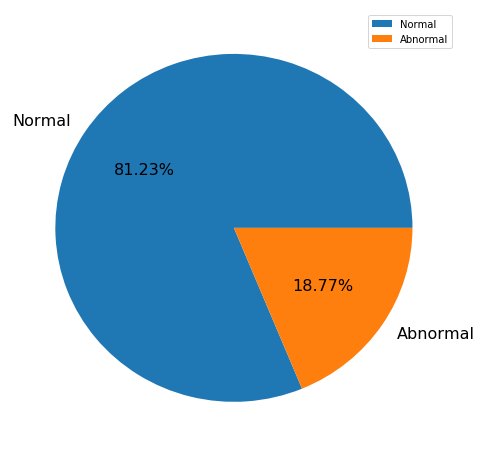

In [9]:
#ferritin
x = ["Normal", "Abnormal"]
y = []
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772ea8390>], dtype=object)

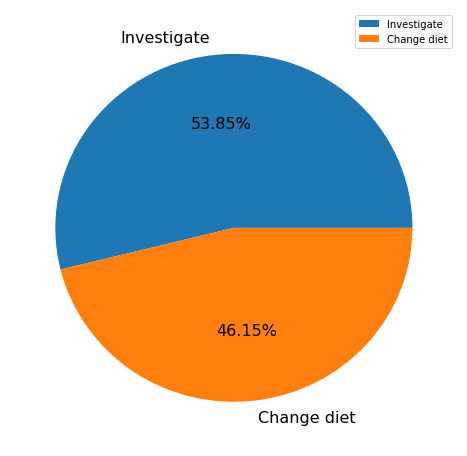

In [10]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0772e5c710>], dtype=object)

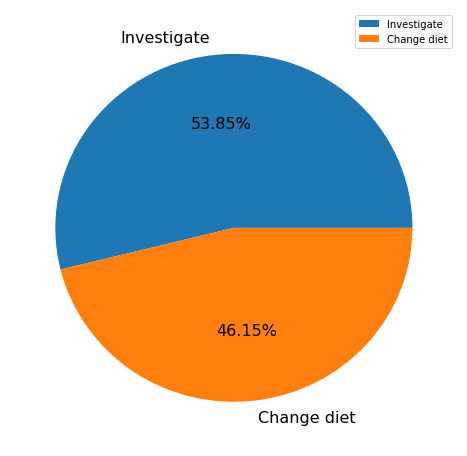

In [11]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

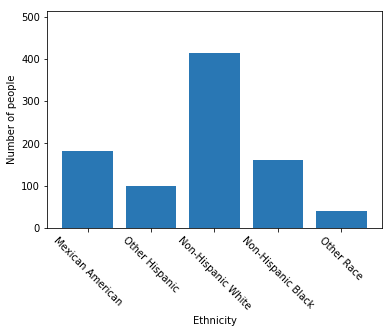

In [12]:


q = "SELECT COUNT(*) FROM basic_information bi JOIN patients AS p ON p.SEQN = bi.SEQN WHERE bi.RIDRETH1 = "

x = ("Mexican American","Other Hispanic", "Non-Hispanic White", "Non-Hispanic Black",
     "Other Race", "Missing")
y = []
for row in c.execute(q+" 1"):
 y.append(int(row[0]))
for row in c.execute(q+" 2"):
 y.append(int(row[0]))
for row in c.execute(q+" 3"):
 y.append(int(row[0]))
for row in c.execute(q+" 4"):
 y.append(int(row[0]))
for row in c.execute(q+" 5"):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Ethnicity')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+100)
plt.xticks(y_pos, x, rotation=-45)
 
plt.show()

### Dendrograms (Nhanes)

In [13]:
# # Data set
# queries = []

# bowel_health = "BHQ010, BHQ020, BHQ030, BHQ040, BHD050, "
# alcohol_use = "ALQ101, ALQ120Q, ALQ120U, ALQ130, ALQ140Q, ALQ140U, ALQ150, "
# consumer_behavior = "CBD010, CBQ020, CBQ030, CBQ040, CBQ050, CBQ060, "
# nutrition = "DBQ010, DBQ700, DBQ197, DBQ229, DBQ235A, DBD895, DBD900, DBD905, DBD910, DBQ920, DBQ925A, DBQ925B, DBQ925C, DBQ925D, DBQ925E, DBQ925F, DBQ925G, DBQ925H, DBQ925I, DBQ925J,"
# health_status = "HSQ470, HSQ480, HSQ490, HSQ493, HSQ496, HSQ500, HSQ510, "
# basic_information = "RIAGENDR, DMDBORN2, RIDRETH1 "
  
# registers = bowel_health+alcohol_use+consumer_behavior+nutrition+health_status+basic_information

# q = "SELECT "+registers+" FROM patients p JOIN bowel_health ON  bowel_health.SEQN = p.SEQN "+\
#     "JOIN alcohol_use ON  alcohol_use.SEQN = p.SEQN JOIN consumer_behavior ON  consumer_behavior.SEQN = p.SEQN "+\
#     "JOIN nutrition ON  nutrition.SEQN = p.SEQN JOIN health_status ON  health_status.SEQN = p.SEQN "+\
#     "JOIN basic_information ON basic_information.SEQN = p.SEQN"
# for row in c.execute(q):
#     queries.append(row)

# names = ["BHQ010", "BHQ020", "BHQ030", "BHQ040", "BHD050", "ALQ101", "ALQ120Q",
#      "ALQ120U", "ALQ120Q", "ALQ120U", "ALQ130", "ALQ140Q", "ALQ140U", "ALQ150",
#     "CBD010", "CBQ020", "CBQ030", "CBQ040", "CBQ050", "CBQ060",
#     "DBQ010", "DBQ700", "DBQ197", "DBQ229", "DBQ235A", 
#     "DBD895", "DBD900", "DBD905", "DBD910", "DBQ920", "DBQ925A", "DBQ925B", 
#     "DBQ925C", "DBQ925D", "DBQ925E", "DBQ925F", "DBQ925G", "DBQ925H",
#     "DBQ925I", "DBQ925J","HSQ470", "HSQ480", "HSQ490", "HSQ493", "HSQ496",
#     "HSQ500","HSQ510", "RIAGENDR", "DMDBORN2", "RIDRETH1"]
# with open('features.csv', mode='w') as result_file:
#     result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     result_writer.writerow(names)
#     for query in queries:
#         result_writer.writerow([0 if x=='nan' else x for x in query])
        
# df = pd.read_csv('features.csv')
# df = df.set_index('BHQ010')
# del df.index.name
# df

# #normalized
# df_norm_col=(df-df.mean())/df.std()

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

# # sns.set_style("ticks")
# # sns.boxplot(data=df_norm_col)

# # sns.clustermap(df, z_score=1)


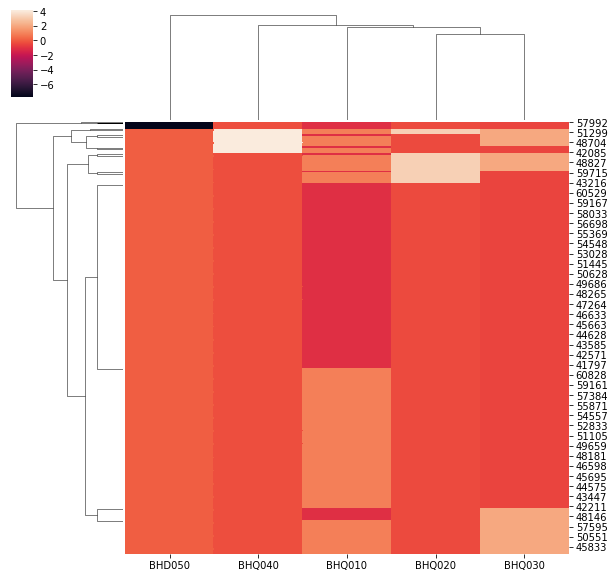

In [14]:
# Data set
queries = []
bowel_health = "b.SEQN, b.BHQ010_b, b.BHQ020_b, b.BHQ030_b, b.BHQ040_b, b.BHD050_b "
registers = bowel_health
q = "SELECT "+registers+" FROM patients p JOIN bowel_health AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN","BHQ010", "BHQ020", "BHQ030", "BHQ040", "BHD050"]
with open('f.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('f.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

sns.clustermap(df, metric = "euclidean" , z_score=1)


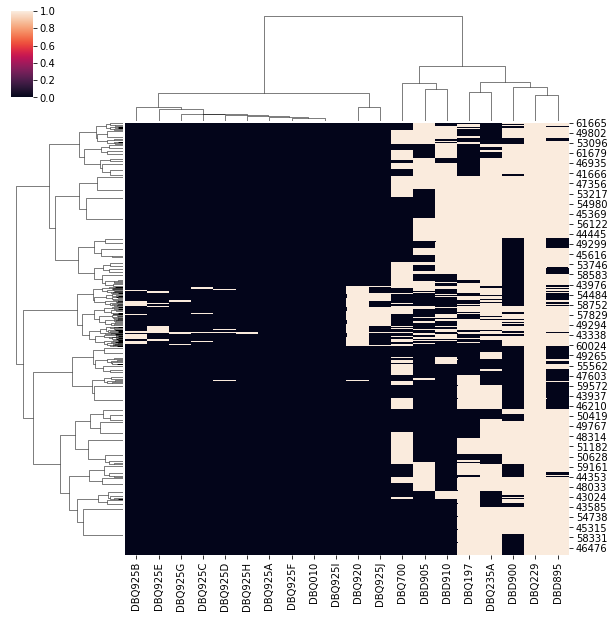

In [15]:
# Data set
queries = []
nutrition = "b.SEQN, b.DBQ010_b, b.DBQ700_b, b.DBQ197_b, b.DBQ229_b, b.DBQ235A_b, b.DBD895_b, b.DBD900_b, b.DBD905_b, b.DBD910_b, b.DBQ920_b, b.DBQ925A_b, b.DBQ925B_b, b.DBQ925C_b, b.DBQ925D_b, b.DBQ925E_b, b.DBQ925F_b, b.DBQ925G_b, b.DBQ925H_b, b.DBQ925I_b, b.DBQ925J_b "
q = "SELECT "+nutrition+" FROM patients p JOIN nutrition AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN", "DBQ010", "DBQ700", "DBQ197", "DBQ229", "DBQ235A", 
    "DBD895", "DBD900", "DBD905", "DBD910", "DBQ920", "DBQ925A", "DBQ925B", 
    "DBQ925C", "DBQ925D", "DBQ925E", "DBQ925F", "DBQ925G", "DBQ925H",
    "DBQ925I", "DBQ925J"]
with open('n.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('n.csv')
df = df.set_index('SEQN')
del df.index.name
df

#normalized
# df_norm_col=(df-df.mean())/df.std()

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

sns.clustermap(df, metric = "euclidean", method="ward", robust=True)


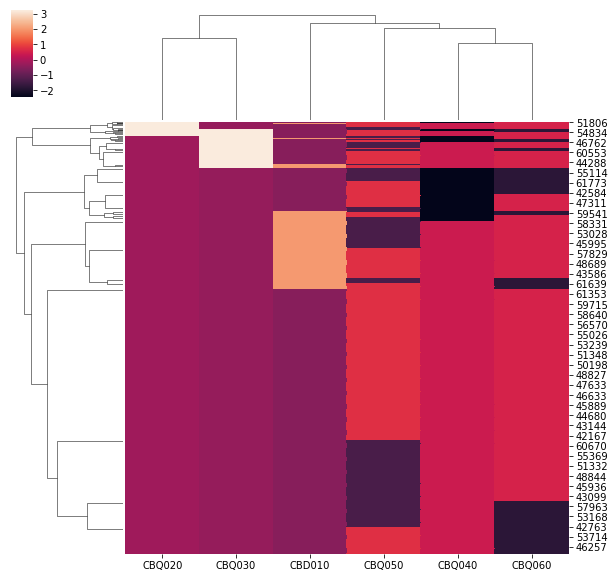

In [63]:
# Data set
queries = []
consumer_behavior = "b.SEQN, b.CBD010_b, b.CBQ020_b, b.CBQ030_b, b.CBQ040_b, b.CBQ050_b, b.CBQ060_b "
q = "SELECT "+consumer_behavior+" FROM patients p JOIN consumer_behavior AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = [ "SEQN", "CBD010", "CBQ020", "CBQ030", "CBQ040", "CBQ050", "CBQ060"]
with open('cconsumer_behavior.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('cconsumer_behavior.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)
sns.clustermap(df, metric = "euclidean", z_score=1, method="ward", robust=True)


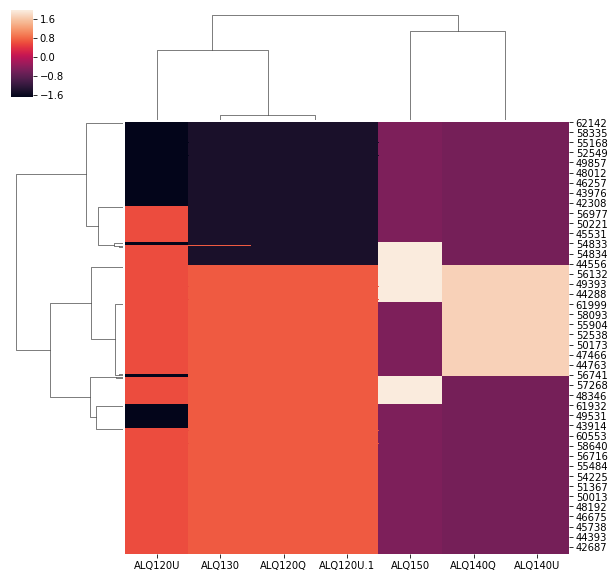

In [17]:
# Data set
queries = []
alcohol_use = "p.SEQN, b.ALQ101_b, b.ALQ120Q_b, b.ALQ120U_b, b.ALQ130_b, b.ALQ140Q_b, b.ALQ140U_b, b.ALQ150_b "
q = "SELECT "+alcohol_use+" FROM patients p JOIN alcohol_use AS b ON  b.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["SEQN", "ALQ120U", "ALQ120Q", "ALQ120U", "ALQ130", "ALQ140Q", "ALQ140U", "ALQ150"]
with open('alcohol_use.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('alcohol_use.csv')
df = df.set_index('SEQN')
del df.index.name
df

# fig, ax = plt.subplots(figsize=(10,10))   
# pd.DataFrame(df_norm_col, columns=names)
# sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)
sns.clustermap(df, metric = "euclidean" , z_score=1, method="ward", robust=True)

### Network (from Machine Learning dataset)

In [18]:
c.execute("DROP TABLE IF EXISTS exams")
conn.commit()
c.execute('''CREATE TABLE exams(
  SEQN integer,
  Mouth integer,
  Oesophagus integer,
  Stomach integer,
  Duodenum integer,
  Ileum integer,
  AColon integer,
  TColon integer,
  DColon integer,
  Rectum integer,
  Perianal integer,
  Mouth_h integer,
  Oesophagus_h integer,
  Stomach_h integer,
  Duodenum_h integer,
  Ileum_h integer,
  AColon_h integer,
  TColon_h integer,
  DColon_h integer,
  Rectum_h integer,
  Perianal_h integer,
  Diagnosis text
)''')

c.execute("CREATE INDEX id_exams on exams  (SEQN)")



In [89]:
with open("data/endoscopy.csv", mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("SELECT SEQN FROM exams WHERE SEQN = '" +row["SEQN"] + "'")
         if c.fetchone() == None:
            c.execute("INSERT INTO exams (SEQN, Mouth, Oesophagus, Stomach, Duodenum, Ileum, AColon, TColon, DColon, Rectum, Perianal) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (
                row["SEQN"], row["Mouth"], row["Oesophagus"], row["Stomach"],
                row["Duodenum"], row["Ileum"], row["AColon"], row["TColon"], row["DColon"], row["Rectum"], row["Perianal"]))
conn.commit()

with open("data/histology.csv", mode='r') as csv_file:
      csv_reader = csv.DictReader(csv_file)
      for row in csv_reader:
         c.execute("UPDATE exams SET Mouth_h ="+ row["Mouth"]+\
                      ", Oesophagus_h = "+row["Oesophagus"]+" , Stomach_h  ="+ row["Stomach"]+\
                      ", Duodenum_h = "+row["Duodenum"]+" , Ileum_h = "+ row["Ileum"]+\
                      " , AColon_h = "+ row["AColon"]+", TColon_h = "+row["TColon"]+\
                      ", DColon_h ="+ row["DColon"]+" , Rectum_h = "+ row["Rectum"]+\
                      " , Perianal_h = "+row["Perianal"]+", Diagnosis = '"+row["Diagnosis"]+"' "+\
                      " WHERE SEQN = '"+row['SEQN'] + "'")
conn.commit()

# for row in c.execute("SELECT * FROM exams"):
#     print(row)

In [44]:
registers = ["Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon",
             "DColon", "Rectum_h", "Perianal_h", "Mouth_h", "Oesophagus_h", "Stomach_h", "Duodenum_h",
            "Ileum_h", "AColon_h", "TColon_h","DColon_h", "Rectum_h", "Perianal_h" ]
                 
tables = ["histology", "endoscopy"]

queries = []
r = ""
for i in range(0, len(registers)-2):
   for j in range(i+1, len(registers)-1):  
        q = "SELECT e."+registers[i]+", e."+registers[j]+", COUNT(*) FROM exams e "+\
        "WHERE e."+registers[i]+" = 1 AND e."+registers[j]+" = 1 "
        for row in c.execute(q):
            if row[2] >= 1:
                r = [registers[i], registers[j],str(row[2])]
#                 print(r)
                queries.append(r)
with open('exams.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for query in queries:
        result_writer.writerow(query)

(52.526230533902201,
 112.88698723486679,
 15.848325557721765,
 62.231663077216176)

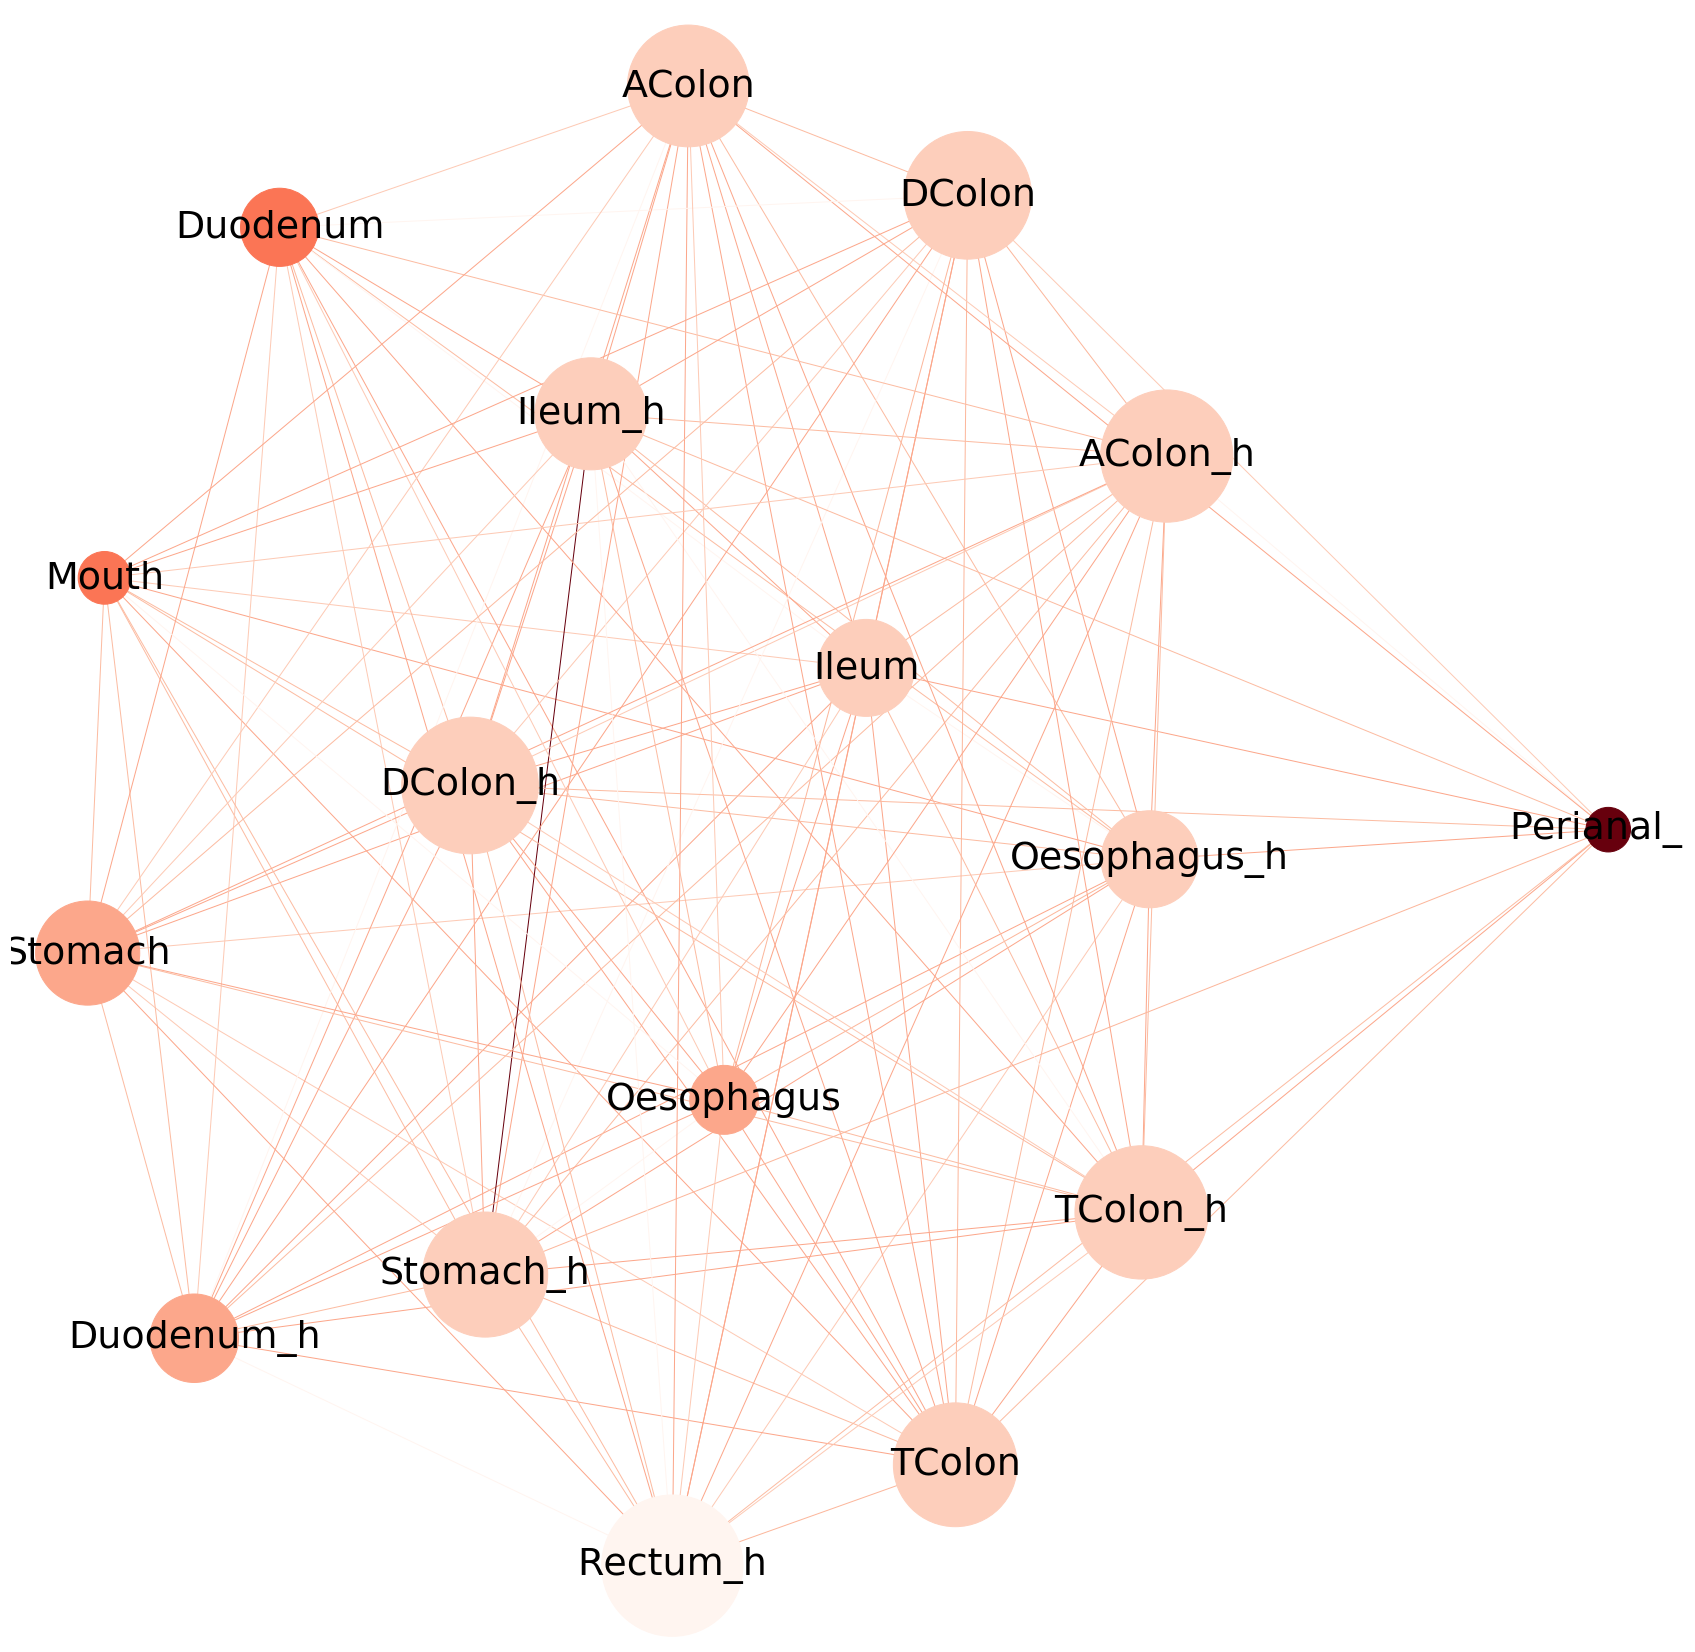

In [82]:
G = nx.Graph()

with open('exams.csv', mode='r') as edges: 
  for edge in edges:
     # print(edge)
     e = edge.split(",")
     G.add_edge(e[0],e[1],weight=int(e[2]))
# position is stored as node attribute data for random_geometric_graph
# G = nx.convert_node_labels_to_integers(G)
# pos = nx.random_layout(G)
pos =  nx.drawing.nx_agraph.graphviz_layout(G,prog='sfdp')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
  x, y = pos[n]
  d = (x - 0.5)**2 + (y - 0.5)**2
  if d < dmin:
     ncenter = n
     dmin = d

# color by path length from node near center
# p = dict(nx.pagerank(G))
# p = dict(nx.katz_centrality(G))
# p = dict(nx.clustering(G))
p = dict(nx.eigenvector_centrality(G))
# p = dict(nx.single_source_shortest_path_length(G, ncenter))
# e = dict(nx.edge_betweenness_centrality(G))
e = dict(nx.edge_load_centrality(G))
# k = dict(nx.degree_centrality(G))
# k = dict(nx.closeness_centrality(G))
k = dict(nx.pagerank(G))

edges,weights = zip(*nx.edge_betweenness_centrality(G).items())

plt.figure(figsize=(30, 30))
nx.draw_networkx_labels(G, pos, font_size=38)
# node_color = [float(H.degree(v)) for v in H]
nx.draw_networkx_edges(G, pos, nodelist=[ncenter],  edge_alpha=0.1, edge_linewidth=0.1, edge_color=weights, edge_cmap=plt.cm.Reds_r)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                    node_size=[( 100 +(v*200000) ) for v in k.values()],
                    node_color=list(p.values()), with_labels=True,
                    cmap=plt.cm.Reds_r)
plt.axis('Off')

### Histology

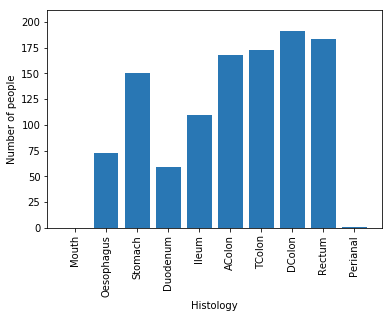

In [101]:
q = "SELECT COUNT(*) FROM exams e WHERE "

registers = ["Mouth_h", "Oesophagus_h", "Stomach_h", "Duodenum_h", "Ileum_h", "AColon_h", "TColon_h", "DColon_h", "Rectum_h", "Perianal_h"]
x = ("Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal")
y = []
for row in c.execute(q+registers[0]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[1]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[2]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[3]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[4]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[5]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[6]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[7]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[8]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[9]+" = 1 "):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Histology')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

### Endoscopy

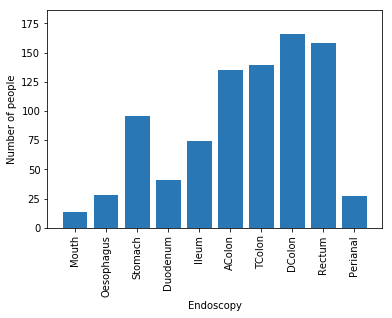

In [100]:
q = "SELECT COUNT(*) FROM exams e WHERE "

registers = ["Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal"]
x = ("Mouth", "Oesophagus", "Stomach", "Duodenum", "Ileum", "AColon", "TColon", "DColon", "Rectum", "Perianal")
y = []
for row in c.execute(q+registers[0]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[1]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[2]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[3]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[4]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[5]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[6]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[7]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[8]+" = 1 "):
 y.append(int(row[0]))
for row in c.execute(q+registers[9]+" = 1 "):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Endoscopy')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()

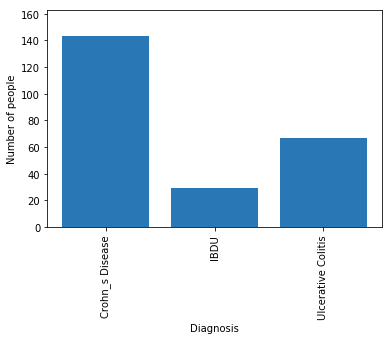

In [99]:
q = "SELECT COUNT(*) FROM exams WHERE Diagnosis = "

d = ["'Crohn_s Disease'", "'IBDU'", "'Ulcerative Colitis'"]
x = ("Crohn_s Disease", "IBDU", "Ulcerative Colitis")
y = []
for row in c.execute(q+d[0]):
 y.append(int(row[0]))
for row in c.execute(q+d[1]):
 y.append(int(row[0]))
for row in c.execute(q+d[2]):
 y.append(int(row[0]))

y_pos = np.arange(len(y))
 
plt.bar(y_pos, y, color = '#2977b4')
plt.xlabel('Diagnosis')
plt.ylabel('Number of people')

plt.ylim(0,max(y)+20)
plt.xticks(y_pos, x, rotation=90)
 
plt.show()